In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("777 Project EDA").getOrCreate()

In [2]:
df = spark.read.csv('diabetes_health_indicators.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- Diabetes_012: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)



In [3]:
#Shape of the datadrame and counting the values in the Diabetes dataset.
print((df.count(),len(df.columns)))
df.groupby('Diabetes_012').count().show()

(253680, 22)
+------------+------+
|Diabetes_012| count|
+------------+------+
|         0.0|213703|
|         1.0|  4631|
|         2.0| 35346|
+------------+------+



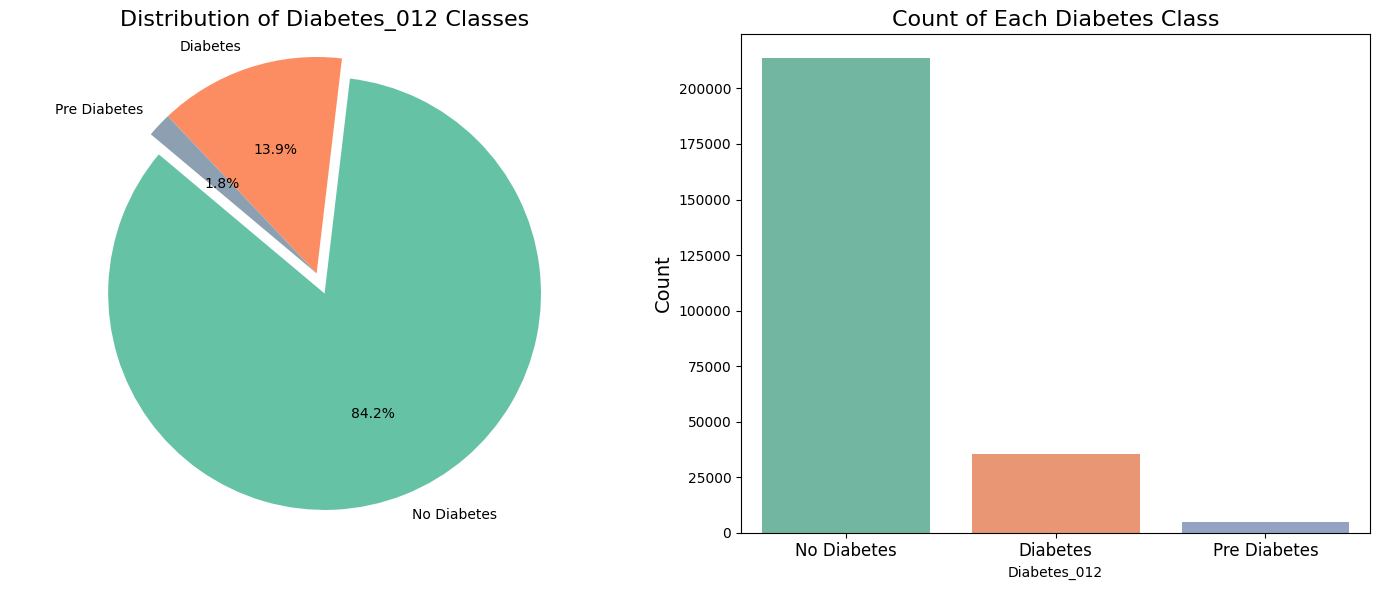

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert to pandas for visualization 
df_pandas = df.select(
    'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 
    'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
    'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
    'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 
    'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
).toPandas()

# Map the class labels to their respective names
label_mapping = {0: 'No Diabetes', 1: 'Pre Diabetes', 2: 'Diabetes'}
df_pandas['Diabetes_012'] = df_pandas['Diabetes_012'].map(label_mapping)

# Count the occurrences of each class
class_counts = df_pandas['Diabetes_012'].value_counts()

# Set up the figure for both plots
plt.figure(figsize=(14, 6))

# Plot a pie chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=['#66c2a5', '#fc8d62', '#8da0b1'], explode=(0.1, 0, 0))  # Explode the first slice
plt.title('Distribution of Diabetes_012 Classes', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot a bar chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.title('Count of Each Diabetes Class', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=range(len(class_counts.index)), labels=class_counts.index, fontsize=12)

# Show both plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


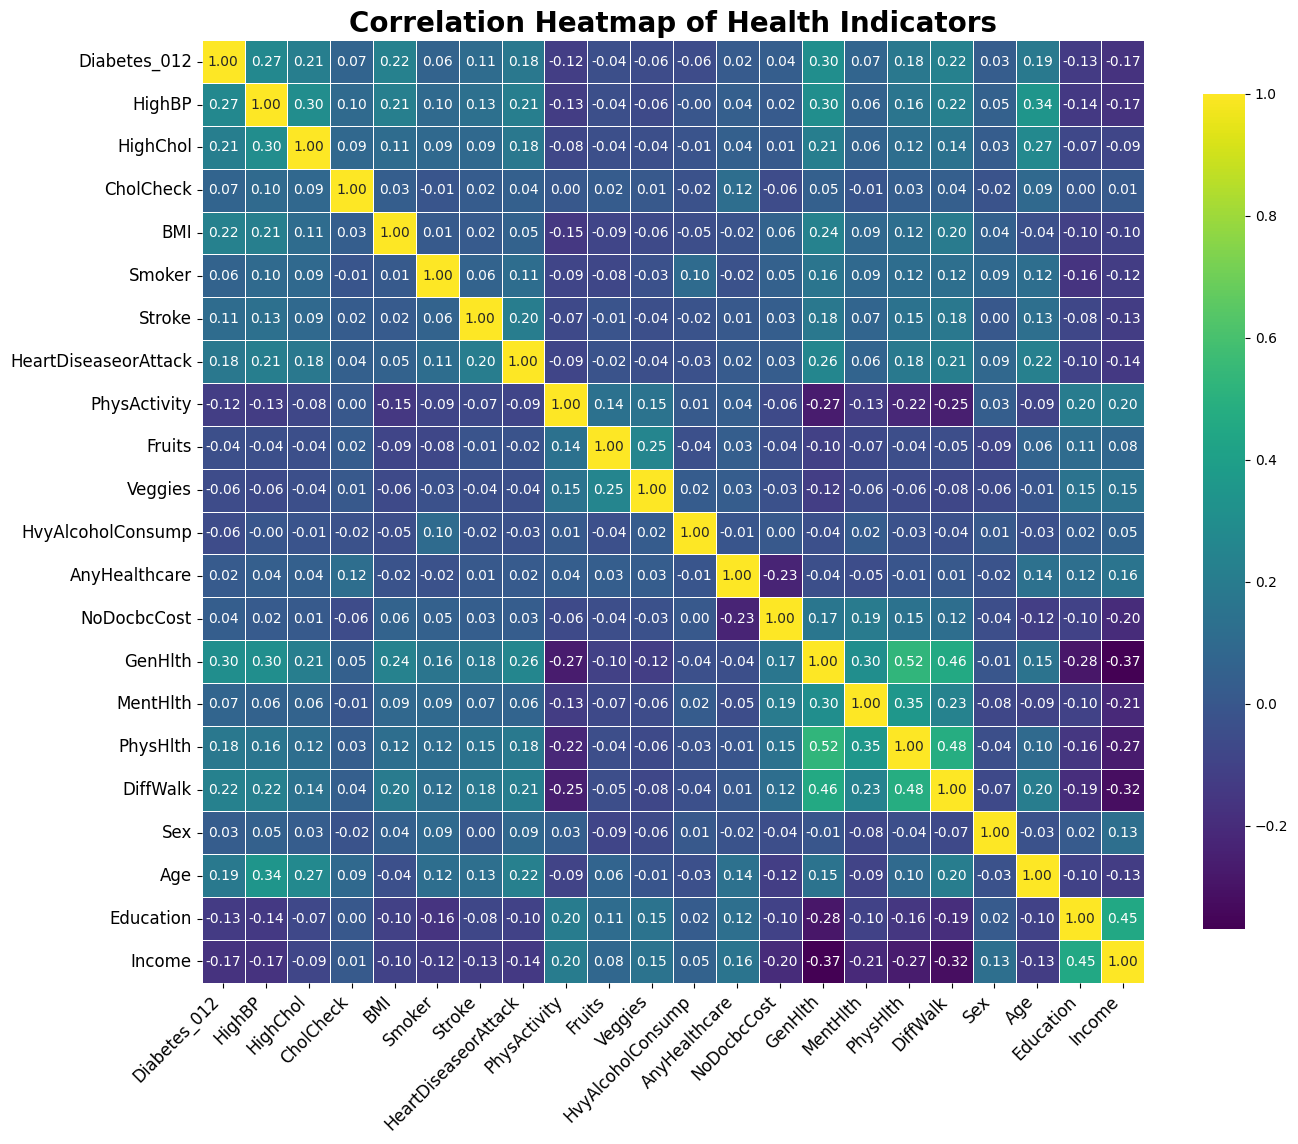

In [9]:
df_pandas = df.select(
    'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 
    'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
    'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
    'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 
    'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
).toPandas()

# Calculate the correlation matrix
correlation_matrix = df_pandas.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with improved aesthetics
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', 
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5,
            linecolor='white')

# Customize the appearance
plt.title('Correlation Heatmap of Health Indicators', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Add a grid for better readability
plt.grid(False)  # Disable default grid
plt.tight_layout()  # Adjust layout to fit labels better

# Show the plot
plt.show()